<a href="https://colab.research.google.com/github/VimalChamyal/ecommerce-data-analysis/blob/main/ecommerce_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Loading the dataset

In [3]:
url = 'https://raw.githubusercontent.com/VimalChamyal/ecommerce-data-analysis/main/SampleDataset.csv'

In [4]:
df = pd.read_csv(url)
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


Skimming through the data

In [5]:
df.info()

# No null values found

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
df.describe()

# There's a huge difference between max profit and min profit.
# We are ending up giving 80% discount also somewhere, need to understand why
# Huge difference between max and min sales. 

# By the first glance we can thus say that definitely we have a scope of improving our profit.

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


Checking the duplicates

In [7]:
df.duplicated().sum()

17

In [8]:
# Droping the 17 duplicate values as they are quite less

df = df.drop_duplicates()

In [9]:
df.duplicated().sum()

# Rechecking for the duplicates

0

Checking for the missing values if there are any

In [10]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [11]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


Checking for unique values in columns

In [12]:
n = df.nunique(axis=0)
  
print("No.of.unique values in each column :\n", n)

No.of.unique values in each column :
 Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64


Data Analysis | EDA

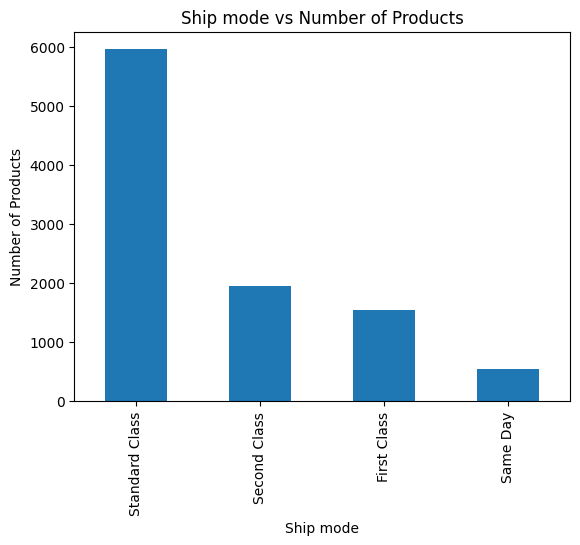

In [13]:
df['Ship Mode'].value_counts().plot(kind="bar")
plt.title("Ship mode vs Number of Products")
plt.xlabel("Ship mode")
plt.ylabel("Number of Products")

plt.show()

# We can see that Standard class ship mode is the most preffered 

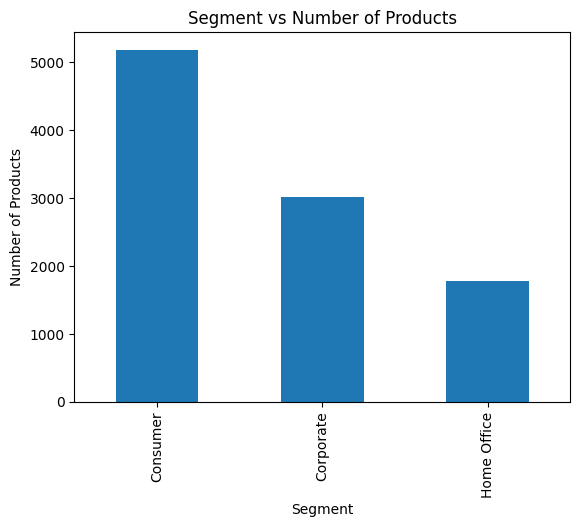

In [14]:
df['Segment'].value_counts().plot(kind="bar")
plt.title("Segment vs Number of Products")
plt.xlabel("Segment")
plt.ylabel("Number of Products")

plt.show()

# We can see that most of the products are from consumer segment 

In [15]:
df['City'].value_counts()

# We are operating in 531 cities of US out of which the top 5 countries are as below

New York City      914
Los Angeles        746
Philadelphia       536
San Francisco      506
Seattle            424
                  ... 
Glenview             1
Missouri City        1
Rochester Hills      1
Palatine             1
Manhattan            1
Name: City, Length: 531, dtype: int64

In [16]:
df['State'].value_counts()

# State wherein we are operating

California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

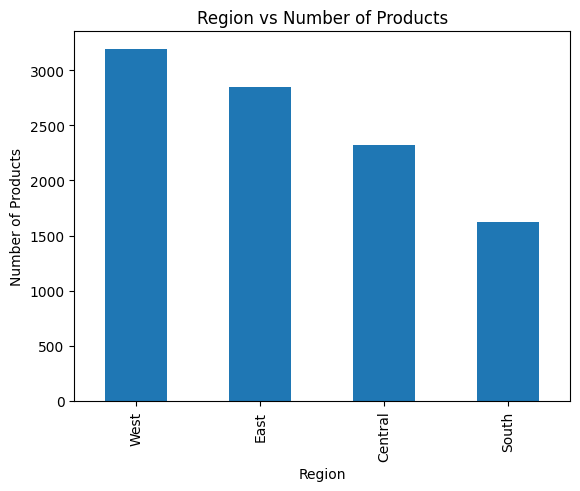

In [17]:
df['Region'].value_counts().plot(kind="bar")
plt.title("Region vs Number of Products")
plt.xlabel("Region")
plt.ylabel("Number of Products")

plt.show()

# We can see that most of the products are getting sold in west and east US

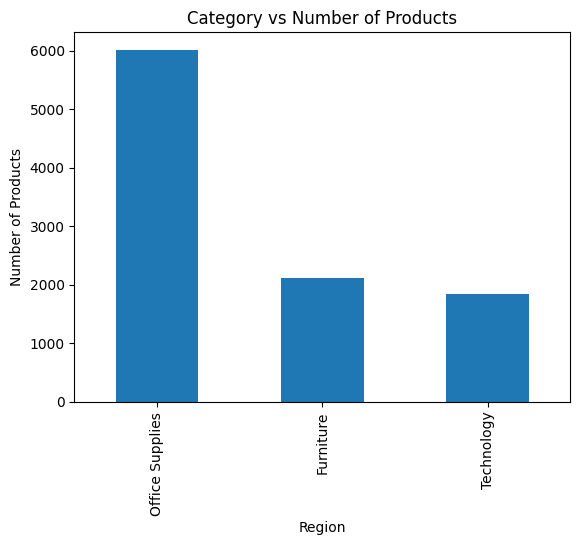

In [18]:
df['Category'].value_counts().plot(kind="bar")
plt.title("Category vs Number of Products")
plt.xlabel("Category")
plt.ylabel("Number of Products")

plt.show()

# We can see that most of the products are from Office Supplies sub category

# We may explore Tech & Furniture sector as well. We'll check more on this

<ipython-input-70-86fd9f4de47c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Discount'])


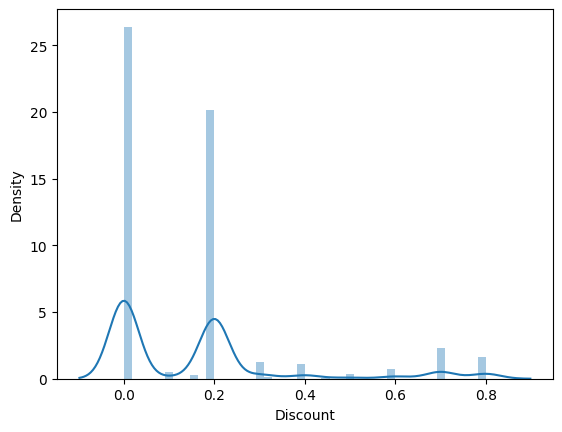

In [70]:
sns.distplot(df['Discount'])
plt.show()

# Either we aren't giving any discounts or we are giving discount of 20-25%. Sometimes we are giving more than 50% discount as well.
# This finding may be useful for us

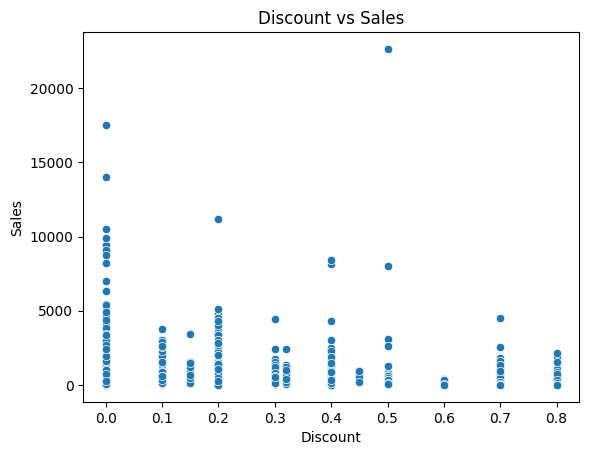

In [78]:
sns.scatterplot(data = df, x = 'Discount', y = 'Sales')
plt.title('Discount vs Sales')
plt.show()

# Can't come up with any significant findings with this scatter plot

# May be checking with profit and then sales may give us better insights

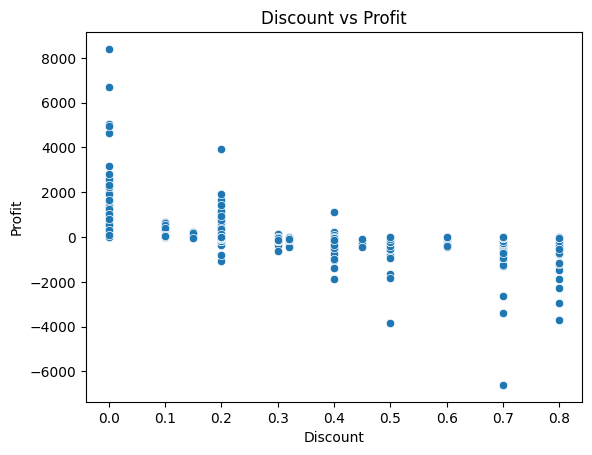

In [115]:
sns.scatterplot(data = df, x = 'Discount', y = 'Profit')
plt.title('Discount vs Profit')
plt.show()

# This scatter plot clearly shows that giving = or > 40% discount isn't helping us a much.

# This can be a very significant finding for us

<ipython-input-73-ffba35df2356>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Quantity'])


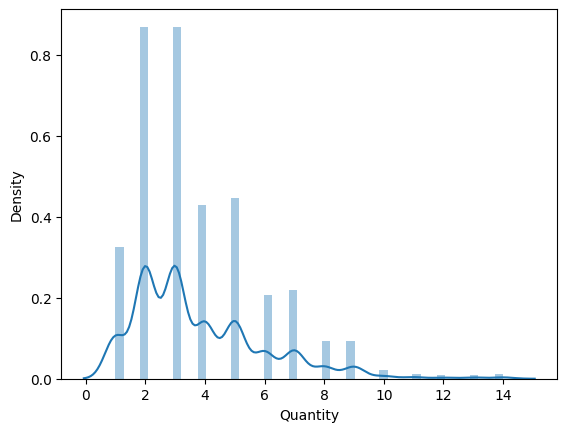

In [73]:
sns.distplot(df['Quantity'])
plt.show()

# Most of the times we are selling 1 - 10 products at a time

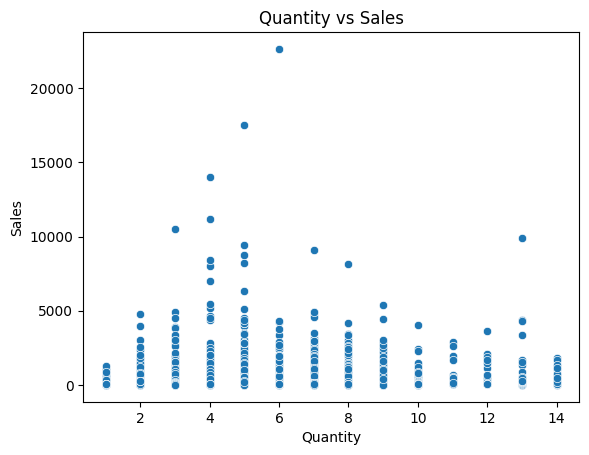

In [90]:
sns.scatterplot(data = df, x = 'Quantity', y = 'Sales')
plt.title('Quantity vs Sales')
plt.show()

# There's a tendency of buying 2-10 items together

# But this information doesn't seem to help us

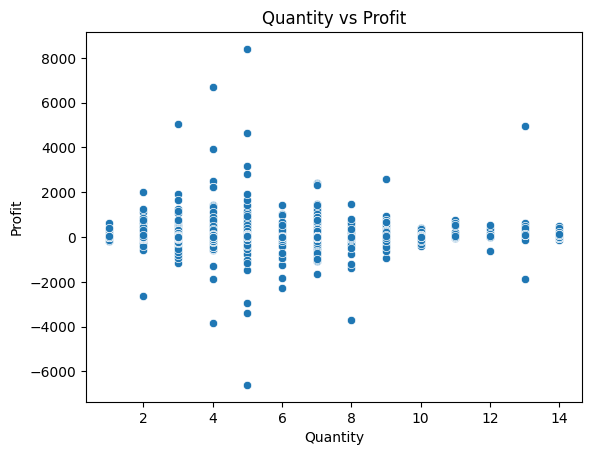

In [89]:
sns.scatterplot(data = df, x = 'Quantity', y = 'Profit')
plt.title('Quantity vs Profit')
plt.show()

# This information doesn't seem to help us

Data Pre-Processing | To check correlation of Profit and Sales with other categorical columns

Data Encoding (Categorical data will be changed to numerical values)

In [106]:
n = df.nunique(axis=0)
  
print("No.of.unique values in each column : \n", n)

# Checking for the unique values in each column

No.of.unique values in each column : 
 Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64


In [107]:
# Encoding the categorical columns

# Encoding the Ship Mode column
df.replace({'Ship Mode' : {'First Class' : 1 , 'Same Day' : 2, 'Second Class' : 3 , 'Standard Class' : 4}}, inplace = True)

# Encoding the Segment column
df.replace({'Segment' : {'Consumer' : 1, 'Corporate' : 2, 'Home Office' : 3}}, inplace = True)

# Encoding the Region column
df.replace({'Region' : {'Central' : 1, 'East' : 2, 'South' : 3, 'West' : 4}}, inplace = True)

# Encoding the Category column
df.replace({'Category' : {'Furniture' : 1, 'Office Supplies' : 2, 'Technology' : 3}}, inplace = True)

Checking the correlation with our profit & sales column 

&

Coming up with most important insights

In [127]:
df.corr()['Profit']

# Negative correlation between Discount and Profit is worth noting here. 
# Positive correlation between Sales and Profit as well

# Little positive correlation between Category and Profit can be worth noting as well. We can hence explore Sub category wrt Profit as well.
# Little positive correlation between Region and Profit can be worth noting as well.

<ipython-input-127-ba98710682a3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Profit']


Ship Mode     -0.006568
Segment        0.013419
Postal Code   -0.029892
Region         0.022295
Category       0.091507
Sales          0.479067
Quantity       0.066211
Discount      -0.219662
Profit         1.000000
Name: Profit, dtype: float64

In [129]:
df.corr()['Sales']

# Positive correlation between Sales and Quantity is worth nothing

# Little positive correlation between Category and Sales can be worth noting as well. We can hence explore Sub category wrt Sales as well.
# Little negative correlation between Postal Code and Sales can be worth noting. We can hence explore Region vs Sales

<ipython-input-129-8938a7ec767c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Sales']


Ship Mode     -0.001764
Segment        0.010936
Postal Code   -0.023476
Region         0.004508
Category       0.040116
Sales          1.000000
Quantity       0.200722
Discount      -0.028311
Profit         0.479067
Name: Sales, dtype: float64

<ipython-input-130-88edb43bf50b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


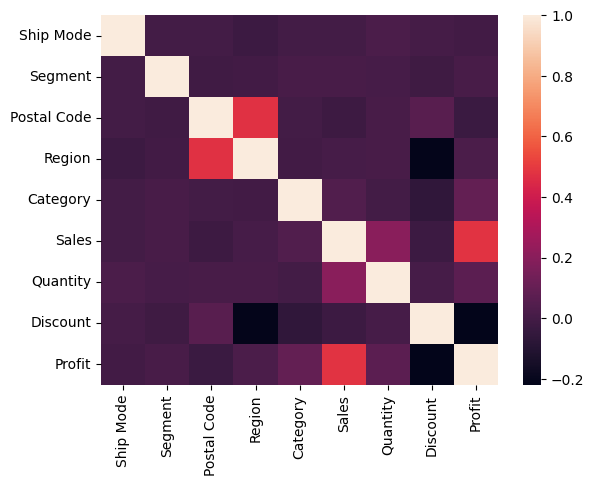

In [130]:
sns.heatmap(df.corr())
plt.show()